# [TEMPLATE] DATASET DEPURADO

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [99]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [100]:
# Colores a utilizar

amarillo = '#FCAA67'
rojo = '#B0413E'
verde = '#FFFFC7'
azul = '#548687'
marron = '#473335'
otro = '#FAEFBF'

<hr>

# Analisis de las diferentes distribuciones de las variables

In [101]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [102]:
df = df[['tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
         'metroscubiertos', 'metrostotales', 'fecha', 'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
         'centroscomercialescercanos', 'precio']]

### Distribucion segun tipo de propiedad

In [103]:
p2 = df.copy()
p2 = p2[['tipodepropiedad']]
conservar = ['Casa', 'Apartamento', 'Casa en condominio', 'Terreno', 'Edificio', 'Local Comercial', 'Oficina comercial']
p2['tipodepropiedad'] = p2['tipodepropiedad'].map(lambda x: x if x in conservar else 'Otros')
p2 = p2['tipodepropiedad'].value_counts(normalize=True).map(lambda x: round(x*100)).to_frame()\
    .reset_index().rename(columns={'index':'tipodepropiedad','tipodepropiedad':'porcentual'})

In [104]:
p2['label'] = p2['tipodepropiedad'] + " "
p2['label'] += "(" + p2['porcentual'].map(lambda x: str(x)) + "%)"

In [105]:
p2

,tipodepropiedad,porcentual,label
0,Casa,59,Casa (59%)
1,Apartamento,24,Apartamento (24%)
2,Casa en condominio,8,Casa en condominio (8%)
3,Terreno,4,Terreno (4%)
4,Otros,2,Otros (2%)
5,Local Comercial,1,Local Comercial (1%)
6,Oficina comercial,1,Oficina comercial (1%)
7,Edificio,1,Edificio (1%)


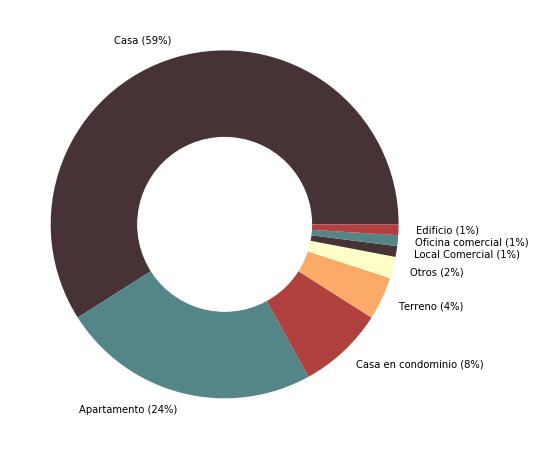

In [106]:
plt.figure(figsize=(8,8))


my_circle=plt.Circle( (0,0), 0.5, color='white')

plt.pie(p2['porcentual'], labels=p2['label'], colors=[marron, azul, rojo, amarillo, verde])
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.savefig('distribucion tipos propiedad.png', transparent=True, bbox_inches='tight')


<hr>

### Distribuciones segun atributos

In [107]:
p1 = df.copy()
p1 = p1[['garages', 'gimnasio', 'piscina', 'usosmultiples', 'escuelascercanas', 'centroscomercialescercanos']]
p1.head()

,garages,gimnasio,piscina,usosmultiples,escuelascercanas,centroscomercialescercanos
0,1,False,False,False,False,False
1,2,False,False,False,True,True
2,2,False,False,False,False,False
3,1,False,False,False,True,True
4,1,False,False,False,False,False


In [108]:
# Veo los nulos
(p1['garages'] == -1).value_counts()

False    202235
True      37765
Name: garages, dtype: int64

In [109]:
garages = p1.copy()
garages = garages.loc[garages['garages'] != -1]['garages']
garages = garages.map(lambda x: True if (x>=1) else False).value_counts(normalize=True).map(lambda x: round(x*100))
garages.index = ['Tiene', 'No tiene']
garages

Tiene       87
No tiene    13
Name: garages, dtype: int64

In [110]:
gimnasios= p1['gimnasio'].value_counts(normalize=True).rename(index={True:'Tiene', False:'No tiene'}).map(lambda x: round(x*100))
piscinas= p1['piscina'].value_counts(normalize=True).rename(index={True:'Tiene', False:'No tiene'}).map(lambda x: round(x*100))
sums=p1['usosmultiples'].value_counts(normalize=True).rename(index={True:'Tiene', False:'No tiene'}).map(lambda x: round(x*100))
escuelas=p1['escuelascercanas'].value_counts(normalize=True).rename(index={True:'Tiene', False:'No tiene'}).map(lambda x: round(x*100))
comerciales=p1['centroscomercialescercanos'].value_counts(normalize=True).rename(index={True:'Tiene', False:'No tiene'}).map(lambda x: round(x*100))

In [118]:
si = 'Tiene'
no = 'No tiene'

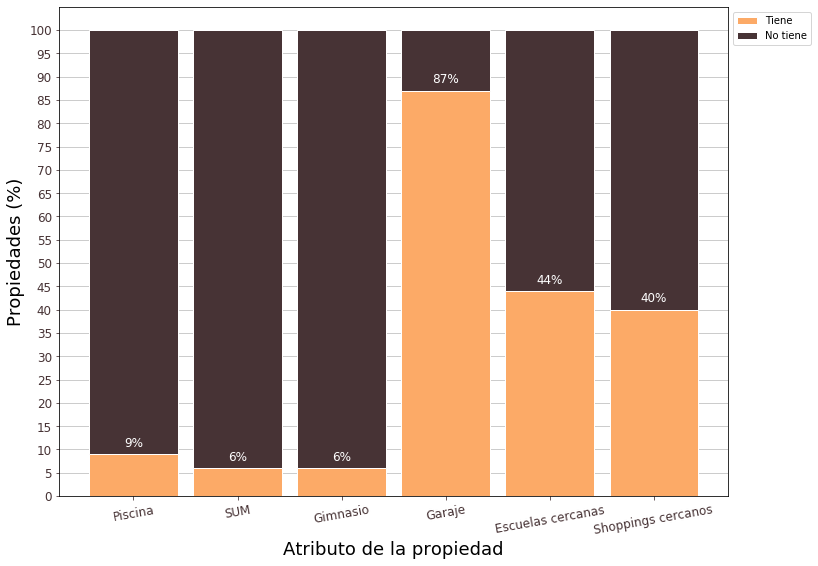

In [183]:
from matplotlib import rc

tiene = [piscinas[si], sums[si], gimnasios[si], garages[si], escuelas[si], comerciales[si]] 
no_tiene = [piscinas[no], sums[no], gimnasios[no], garages[no], escuelas[no], comerciales[no]]

 
# config
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(12,9))
plt.ticklabel_format(style='plain')

# Data
r = [0,1,2,3,4,5]
raw_data = {'pTiene': tiene, 'pNoTiene': no_tiene}
data = pd.DataFrame(raw_data)
names = ('Piscina', 'SUM', 'Gimnasio', 'Garaje', 'Escuelas cercanas', 'Shoppings cercanos')

# plot
barWidth = 0.85
lol = plt.bar(r, data['pTiene'], color=amarillo, edgecolor='white', width=barWidth, label="Tiene")
plt.bar(r, data['pNoTiene'], bottom=data['pTiene'], color=marron, edgecolor='white', width=barWidth, label="No tiene")

plt.xlabel("Atributo de la propiedad", fontsize=18)
plt.ylabel("Propiedades (%)", fontsize=18)
plt.xticks(r, names, rotation=10)
plt.yticks(np.arange(0, 105, step=5))

plt.grid(axis='y')
plt.tick_params(colors=marron, grid_alpha=0.8, labelsize=12)

# Make some labels.
rects= lol.patches

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height)+'%', ha='center', va='bottom',
            color='white', size=12)    
    
    
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.savefig("atributos porcentuales.png", transparent=True, bbox_inches='tight')


